In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
np.random.seed(42)#u will get fix values
data=np.random.randn(100)

In [66]:
data

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [67]:
num_bins = 20 #its just hypertune number of bins to calculate bins_size
bin_size = (np.max(data) - np.min(data)) / num_bins

bins = np.arange(np.min(data), np.max(data) + bin_size, bin_size)#It used to calculate the bin_edges for datapoint what need to be starting point and what need to be ending point its defining
hist, bin_edges = np.histogram(data, bins=bins, density=True)


In [68]:
bins

array([-2.6197451 , -2.39614394, -2.17254278, -1.94894161, -1.72534045,
       -1.50173928, -1.27813812, -1.05453695, -0.83093579, -0.60733462,
       -0.38373346, -0.1601323 ,  0.06346887,  0.28707003,  0.5106712 ,
        0.73427236,  0.95787353,  1.18147469,  1.40507586,  1.62867702,
        1.85227818])

In [69]:
def gaussian_kernel(x, xi, h):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-(x - xi)**2 / (2 * h**2))

In [70]:
kde_values = np.zeros_like(bin_edges, dtype=float)
bandwidth = 0.5  # Adjust this parameter
for i, center in enumerate(bin_edges):
    for xi in data:
        kde_values[i] += gaussian_kernel(center, xi, bandwidth)

kde_values /= len(bin_edges) * bandwidth

In [71]:
i

20

In [72]:
kde_values

array([0.11563593, 0.18412453, 0.2774819 , 0.39441074, 0.53182287,
       0.69119548, 0.88126675, 1.10983624, 1.36704746, 1.61571452,
       1.80341887, 1.88925583, 1.86152345, 1.73538239, 1.54087548,
       1.31241171, 1.08032589, 0.86375901, 0.66851476, 0.49279849,
       0.33687926])

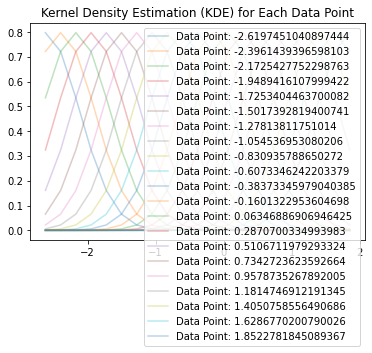

In [74]:
for xi in bin_edges:
    kde_values = np.zeros_like(bin_edges, dtype=float)
    for i, x in enumerate(bin_edges):
        kde_values[i] = gaussian_kernel(x, xi, bandwidth)

    kde_values /= bandwidth  # Adjust normalization if needed

    # Plot PDF for each Data Point
    plt.plot(bin_edges, kde_values, label=f'Data Point: {xi}', alpha=0.3)

# Plotting
plt.legend()
plt.title('Kernel Density Estimation (KDE) for Each Data Point')
plt.show()

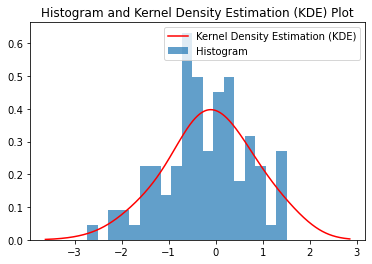

In [78]:
def kde(x, data, h):
    kde_values = np.zeros_like(x, dtype=float)
    for xi in data:
        kde_values += gaussian_kernel(x, xi, h)
    return kde_values / len(data) / h
num_bins = 20
bin_size = (np.max(data) - np.min(data)) / num_bins
bins = np.arange(np.min(data), np.max(data) + bin_size, bin_size)
hist, bin_edges = np.histogram(data, bins=bins, density=True)

plt.bar(bin_edges[:-1], hist, width=bin_size, alpha=0.7, label='Histogram')

bandwidth = 0.5  # Adjust this parameter
x_values = np.linspace(min(data) - 1, max(data) + 1, 1000)
kde_values = kde(x_values, data, bandwidth)

plt.plot(x_values, kde_values, label='Kernel Density Estimation (KDE)', color='red')

# Formatting and Display
plt.legend()
plt.title('Histogram and Kernel Density Estimation (KDE) Plot')
plt.show()